# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import numpy as np

x = np.arange(-3, 4)
y = x * 2

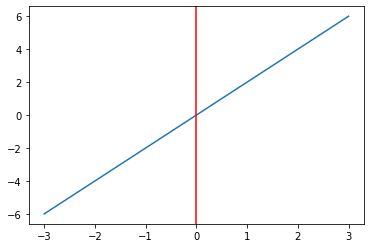

In [2]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.axvline(x=0, color='r')
plt.show()

In [0]:
y = np.arange(-3,4)
x = y**2

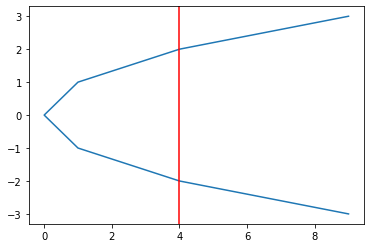

In [5]:
plt.plot(x,y)
plt.axvline(x=4, color='r')
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

There are x-values that map to more than one y-value

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 1 isn't a function because x=1 maps to y=2 and y=3

Relation 2 is a function because each x-value maps to one y-value

Realtion 3 isn't a function because x=9 maps to y=4 and y=6

Relation 4 isn't a function because x=6 maps to y=2 and y=4

Relation 5 isn't a function because x=2 maps to y=6, y=7, and y=4

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

In [0]:
# M - the input is 3d and the output is 3d
# N - the input is 4d and the outup is 2d

In [0]:
def m(z):
  return z[0] + z[1], z[0] + z[2], z[1] + z[2]

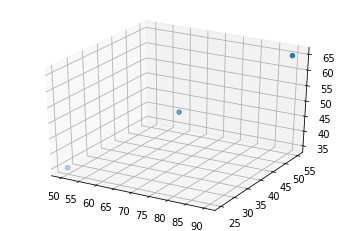

In [11]:
from mpl_toolkits.mplot3d import Axes3D

threedee = plt.figure().gca(projection='3d')
x=[]
y=[]
z=[]
for point in [(20,30,5), (30,40,10), (40,50,15)]:
  x.append(m(point)[0])
  y.append(m(point)[1])
  z.append(m(point)[2])
threedee.scatter(x,y,z)

In [0]:
def n(z):
  return z[1]**2 + z[2], z[1]*z[3]

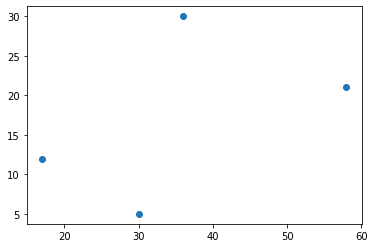

In [27]:
x=[]
y=[]
for point in [(2,4,1,3), (3,5,5,1), (4,6,0,5), (5,7,9,3)]:
  x.append(n(point)[0])
  y.append(n(point)[1])
  
plt.scatter(x, y);

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

In [0]:
# yes if you zero fill the extra dimensions

In [0]:
x = np.arange(-5, 6)
y = x + 2
z = x * 0

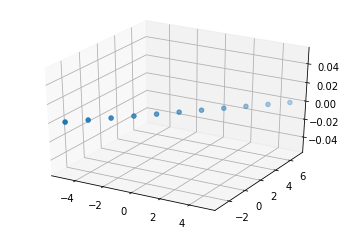

In [15]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(x, y, z)

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [0]:
def p(vect):
  x1 = vect[0][0]
  x2 = vect[1][0]

  row1 = np.array([x1 + 3*x2])
  row2 = np.array([2*x2 - x1])

  return np.array([row1, row2])

In [0]:
i_hat = np.array([[1],[0]])
p_a = p(i_hat)

In [0]:
j_hat = np.array([[0],[1]])
p_b = p(j_hat)

In [36]:
p_T = np.column_stack([p_a,p_b])
p_T

array([[ 1,  3],
       [-1,  2]])

In [0]:
def q(vect):
  x1 = vect[0][0]
  x2 = vect[1][0]
  x3 = vect[2][0]

  row1 = np.array([4*x1 + x2 + 2*x3])
  row2 = np.array([2*x2 - x1 + 3*x3])
  row3 = np.array([5*x1 - 2*x3 + x2])

  return np.array([row1, row2, row3])

In [0]:
i_hat = np.array([[1],[0],[0]])
q_a = q(i_hat)

In [0]:
j_hat = np.array([[0],[1],[0]])
q_b = q(j_hat)

In [0]:
z_hat = np.array([[0],[0],[1]])
q_c = q(z_hat)

In [43]:
q_T = np.column_stack([q_a, q_b, q_c])
q_T

array([[ 4,  1,  2],
       [-1,  2,  3],
       [ 5,  1, -2]])

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [0]:
inputvector_p = np.array([[5],[2]])
inputvector_q = np.array([[2],[1],[7]])

In [49]:
print(p(inputvector_p))
print("\n")
print(np.matmul(p_T, inputvector_p))

[[11]
 [-1]]


[[11]
 [-1]]


In [50]:
print(q(inputvector_q))
print("\n")
print(np.matmul(q_T, inputvector_q))

[[23]
 [21]
 [-3]]


[[23]
 [21]
 [-3]]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

An eigenvector is a vector that only scales with transformations and does not change direction. An eigenvalue is the scalar that shows how the eigenvector was scaled in a transformation.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

In [0]:
# visually graphing data becomes very difficult
# more difficult to search data
# diminishing returns to adding features/parameters
# increased computational workloads
# with more dimensions you increase the risk of overfitting models
# data redundancy



## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

In [0]:
# The number of observations should be greater than the number of parameters when possible with n = 5p as a minimum. 

# Principal Component Analysis

## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [51]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Natinal Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)

print(national.shape)
national.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,3,1985,'1',1,200000,-6,'1',1,6,2364.585097,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,'1 Adequate','-5','1980-1989','1 Single Family','3 3BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,2,1980,'1',1,-6,-6,'2',100,4,2314.524902,2,96874,'1',759,5,'2',146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.98

In [0]:
# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
national.dtypes

CONTROL                 object
AGE1                     int64
METRO3                  object
REGION                  object
LMED                     int64
FMR                      int64
L30                      int64
L50                      int64
L80                      int64
IPOV                     int64
BEDRMS                   int64
BUILT                    int64
STATUS                  object
TYPE                     int64
VALUE                    int64
VACANCY                  int64
TENURE                  object
NUNITS                   int64
ROOMS                    int64
WEIGHT                 float64
PER                      int64
ZINC2                    int64
ZADEQ                   object
ZSMHC                    int64
STRUCTURETYPE            int64
OWNRENT                 object
UTILITY                float64
OTHERCOST              float64
COST06                 float64
COST12                 float64
                        ...   
COSTMedRELAMICAT         int64
COSTMedR

In [52]:
# check for null values
national.isnull().sum().any()

False

In [53]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

32 categorical columns
67 numerical columns


In [54]:
# We're making a copy of our data in case we mess something up.
national_processed = national.copy()

# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
national_processed[cat_cols] = national_processed[cat_cols].astype('category')

national_processed.dtypes

CONTROL            category
AGE1                  int64
METRO3             category
REGION             category
LMED                  int64
                     ...   
FMTINCRELAMICAT    category
FMTASSISTED        category
FMTBURDEN          category
FMTREGION          category
FMTSTATUS          category
Length: 99, dtype: object

In [55]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
  national_processed[col] = national_processed[col].cat.codes

print(national_processed.shape)
national_processed.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,0,82,2,0,73738,956,15738,26213,40322,11067,2,2006,0,1,40000,-6,1,1,6,3117.394239,1,18021,1,533,1,0,169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,1,0,5,1,2,0,4,4,4,4,3,1,1,1,1,1,1,1,1,1,2,0,2,0,0
1,1,50,4,2,55846,1100,17165,28604,45744,24218,4,1980,0,1,130000,-6,1,1,6,2150.725544,4,122961,1,487,1,0,245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,1,0,3,1,4,0,3,4,4,3,4,2,2,2,1,3,3,3,5,3,7,0,1,0,0
2,2,53,4,2,55846,1100,13750,22897,36614,15470,4,1985,0,1,150000,-6,1,1,7,2213.789404,2,27974,1,1405,1,0,159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,1,0,3,1,4,0,4,4,4,4,3,2,2,2,1,2,3,4,5,3,4,0,3,0,0
3,3,67,4,2,55846,949,13750,22897,36614,13964,3,1985,0,1,200000,-6,1,1,6,2364.585097,2,32220,1,279,1,0,179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,1,0,3,1,3,0,4,4,4,4,4,2,2,2,2,2,5,6,6,4,4,0,1,0,0
4,4,26,0,2,60991,737,14801,24628,39421,15492,2,1980,0,1,-6,-6,2,100,4,2314.524902,2,96874,1,759,5,1,146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,1,1,3,5,2,1,3,3,3,3,4,2,2,2,2,3,2,2,2,2,7,1,1,0,0


In [56]:
# Now we only ahve numeric columns (ints and floats)
national_processed.dtypes

CONTROL            int32
AGE1               int64
METRO3              int8
REGION              int8
LMED               int64
                   ...  
FMTINCRELAMICAT     int8
FMTASSISTED         int8
FMTBURDEN           int8
FMTREGION           int8
FMTSTATUS           int8
Length: 99, dtype: object

In [0]:
from sklearn.preprocessing import StandardScaler

feature_cols = national_processed.columns[1:]

In [0]:
x = national_processed.loc[:,feature_cols].values
x = StandardScaler().fit_transform(x)

In [61]:
national_processed = pd.DataFrame(x, columns=feature_cols)
national_processed.head()

,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,ABL50,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,1.488075,0.608784,-1.327872,0.454953,-0.528766,-0.444470,-0.445262,-0.553127,-0.681429,-0.603700,1.504196,-0.271749,-0.142292,-0.409728,-0.26814,-0.518234,-0.253701,0.193641,0.989256,-0.345248,-0.582421,-0.001189,-0.538157,-0.626460,-0.858681,-0.108318,1.002403,-0.524572,-0.489431,-0.511002,-0.535753,-0.693001,-0.774303,0.454953,-0.444470,-0.445262,-0.553127,-0.100276,-0.139349,-0.140598,...,0.448213,-0.508180,-0.588115,-0.524716,-1.139197,-0.294200,0.432580,-0.487463,-0.685212,-0.580668,-0.896546,-0.272848,0.472927,-0.526199,-0.452728,-0.001189,-0.706647,1.728565,-0.627170,-0.612264,-0.858681,0.676610,0.649838,0.615731,0.703541,0.071352,-0.518776,-0.588115,-0.685212,-0.452728,-1.091609,-0.956874,-1.028145,-1.139197,-0.896546,-0.779119,-0.709278,0.549473,-0.462107,0.0
1,0.088812,2.184270,0.576698,-0.991324,-0.163391,-0.123184,-0.122457,-0.043566,1.140132,1.224839,0.515773,-0.271749,-0.142292,-0.048319,-0.26814,-0.518234,-0.253701,0.193641,0.213178,0.823743,0.827974,-0.001189,-0.584987,-0.626460,-0.858681,0.478101,-0.065553,-0.214100,-0.155728,-0.190289,-0.235410,1.204959,-0.774303,-0.991324,-0.123184,-0.122457,-0.043566,0.108920,-0.207233,-0.206327,...,0.448213,-0.135192,0.796007,-0.102732,0.682587,-0.316521,0.432580,-0.084420,0.716067,-0.203481,0.115986,-0.399199,0.167739,-0.199905,-0.452728,-0.001189,-0.706647,0.467274,-0.627170,1.390040,-0.858681,-0.080937,0.649838,0.615731,-0.052382,0.778350,0.859820,0.796007,0.716067,-0.452728,0.926091,0.024966,-0.077478,0.682587,0.115986,1.171883,-0.709278,-0.544709,-0.462107,0.0
2,0.219993,2.184270,0.576698,-0.991324,-0.163391,-0.892063,-0.892949,-0.901606,-0.071564,1.224839,0.705854,-0.271749,-0.142292,0.031993,-0.26814,-0.518234,-0.253701,0.718708,0.263808,0.044416,-0.448652,-0.001189,0.349585,-0.626460,-0.858681,-0.185141,-0.208710,-0.198696,-0.116072,-0.164791,-0.229295,-0.260945,-0.774303,-0.991324,-0.892063,-0.892949,-0.901606,-0.443533,-0.201751,-0.203806,...,0.448213,-0.099583,0.796007,-0.053669,0.682587,-0.035118,0.432580,-0.028753,0.716067,-0.196046,0.115986,-0.129488,0.472927,-0.191508,-0.452728,-0.001189,-0.706647,0.467274,-0.627170,1.390040,-0.858681,0.676610,0.649838,0.615731,0.703541,0.071352,0.859820,0.796007,0.716067,-0.452728,-0.082759,0.024966,0.397856,0.682587,0.115986,0.001282,-0.709278,1.643655,-0.462107,0.0
3,0.832170,2.184270,0.576698,-0.991324,-0.546527,-0.892063,-0.892949,-0.901606,-0.280162,0.310570,0.705854,-0.271749,-0.142292,0.232776,-0.26814,-0.518234,-0.253701,0.193641,0.384872,0.044416,-0.391586,-0.001189,-0.796742,-0.626460,-0.858681,-0.031494,0.019197,0.031870,0.106710,0.062991,0.003272,-0.693001,-0.774303,-0.991324,-0.892063,-0.892949,-0.901606,-0.443533,-0.634993,-0.636447,...,0.448213,0.425176,0.796007,0.351204,1.138032,0.296510,0.432580,0.486190,0.716067,0.220677,0.622252,0.212108,0.472927,0.336529,0.923669,-0.001189,-0.706647,0.467274,-0.627170,0.388888,-0.858681,0.676610,0.649838,0.615731,0.703541,0.778350,0.859820,0.796007,0.716067,0.923669,-0.082759,1.006807,1.348523,1.138032,0.622252,0.001282,-0.709278,-0.544709,-0.462107,0.0
4,-0.960634,-0.966702,0.576698,-0.575

In [0]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)

In [74]:
pca2.fit(national_processed)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
np_vecs = pca2.transform(national_processed)

In [85]:
sum(pca2.explained_variance_ratio_)

0.4898219204099965

In [67]:
df_np_vecs = pd.DataFrame(np_vecs, columns=['x', 'y'])
df_np_vecs.head()

,x,y
0,-2.607484,-1.380332
1,2.010313,-0.992019
2,1.184849,0.366219
3,2.791772,1.719967
4,-1.600407,-0.882243


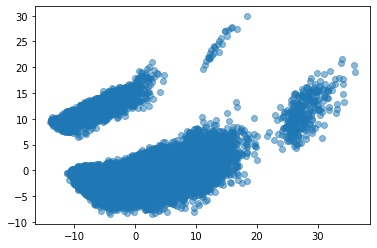

In [79]:
plt.scatter(df_np_vecs['x'], df_np_vecs['y'], alpha=.5);

In [78]:
pca1 = PCA(n_components=1)
np_vecs_1 = pca1.fit_transform(national_processed)
df_np_vecs_pca1 = pd.DataFrame(np_vecs_1, columns=['x'])
df_np_vecs_pca1.head()

,x
0,-2.607484
1,2.010313
2,1.184849
3,2.791772
4,-1.600407


In [86]:
sum(pca1.explained_variance_ratio_)

0.3439121332906

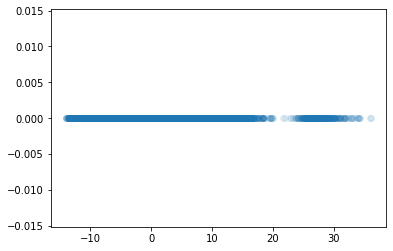

In [83]:
plt.scatter(df_np_vecs_pca1['x'], np.zeros(len(df_np_vecs_pca1['x'])), alpha=.1);

# Stretch Goals

## 1) Perform further data exploration on the HADS national dataset (the version before we one-hot encoded it) Make scatterplots and see if you can see any resemblance between the original scatterplots and the plot of the principal components that you made in 7.1. 

(You may or may not not see very much resemblance depending on the variables you choose, and that's ok!)

## 2) Study "Scree Plots" and then try and make one for your PCA dataset. How many principal conponents do you need to retain in order for your PCs to contain 90% of the explained variance? 

We will present this topic formally at the beginning of tomorrow's lecture, so if you figure this stretch goal out, you're ahead of the game. 

## 3) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

Prioritize self-study over this stretch goal if you are not semi-comfortable with the topics of PCA, Eigenvalues, and Eigenvectors.

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)